In [1]:
import qiskit
from qiskit import *
import numpy as np

from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

In [2]:
n=10

In [3]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

In [4]:
#Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) #all qubits are initialized to zero
# for recording the measurement on the first register
cr = ClassicalRegister(n)

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.iden(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

The oracle returns a balanced function


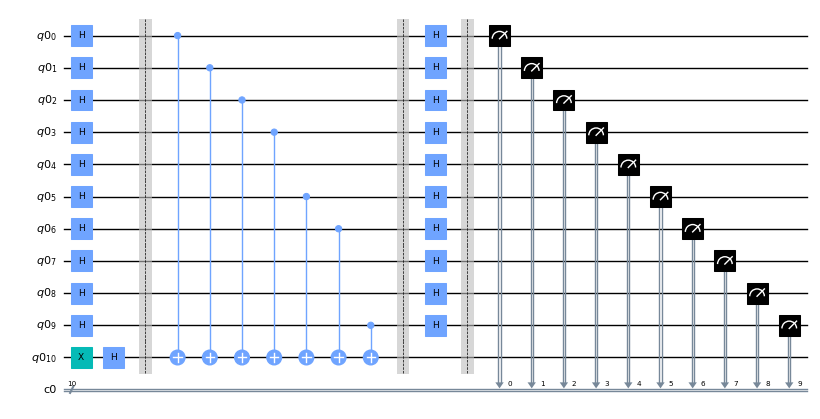

In [5]:
#draw the circuit
djCircuit.draw(output='mpl',scale=0.5)

In [6]:
from qiskit.visualization import plot_histogram
with Session(service, backend='ibmq_qasm_simulator') as session:
    sampler = Sampler(session=session)
    result = sampler.run(djCircuit, shots=1024).result().quasi_dists[0]

## Deustch algorithm

Transpilation : to optimize the circuit when te

f : {}

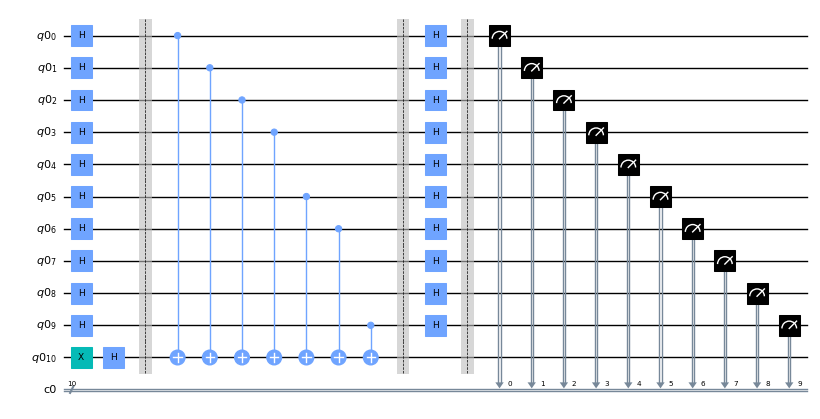

In [8]:
djCircuit.draw(output='mpl',scale=0.5)

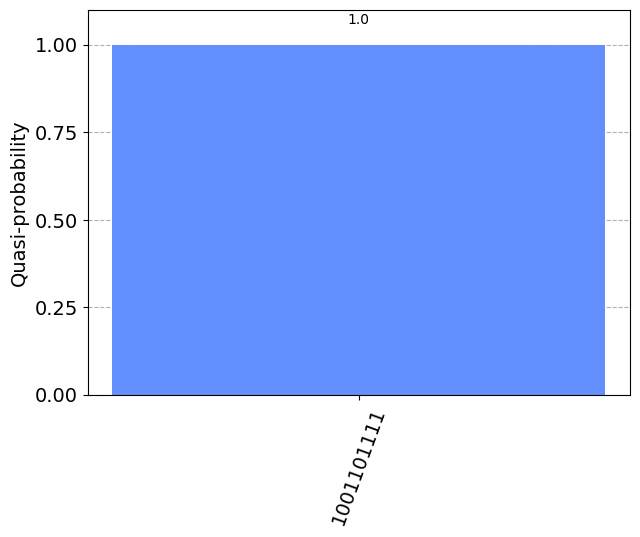

In [13]:
plot_distribution(result.binary_probabilities())

In [14]:
print(result.binary_probabilities())

{'1001101111': 1.0}


In [16]:
from qiskit.visualization import plot_histogram
with Session(service, backend=backend) as session:
    sampler = Sampler(session=session)
    result = sampler.run(djCircuit, shots=104).result().quasi_dists[0]

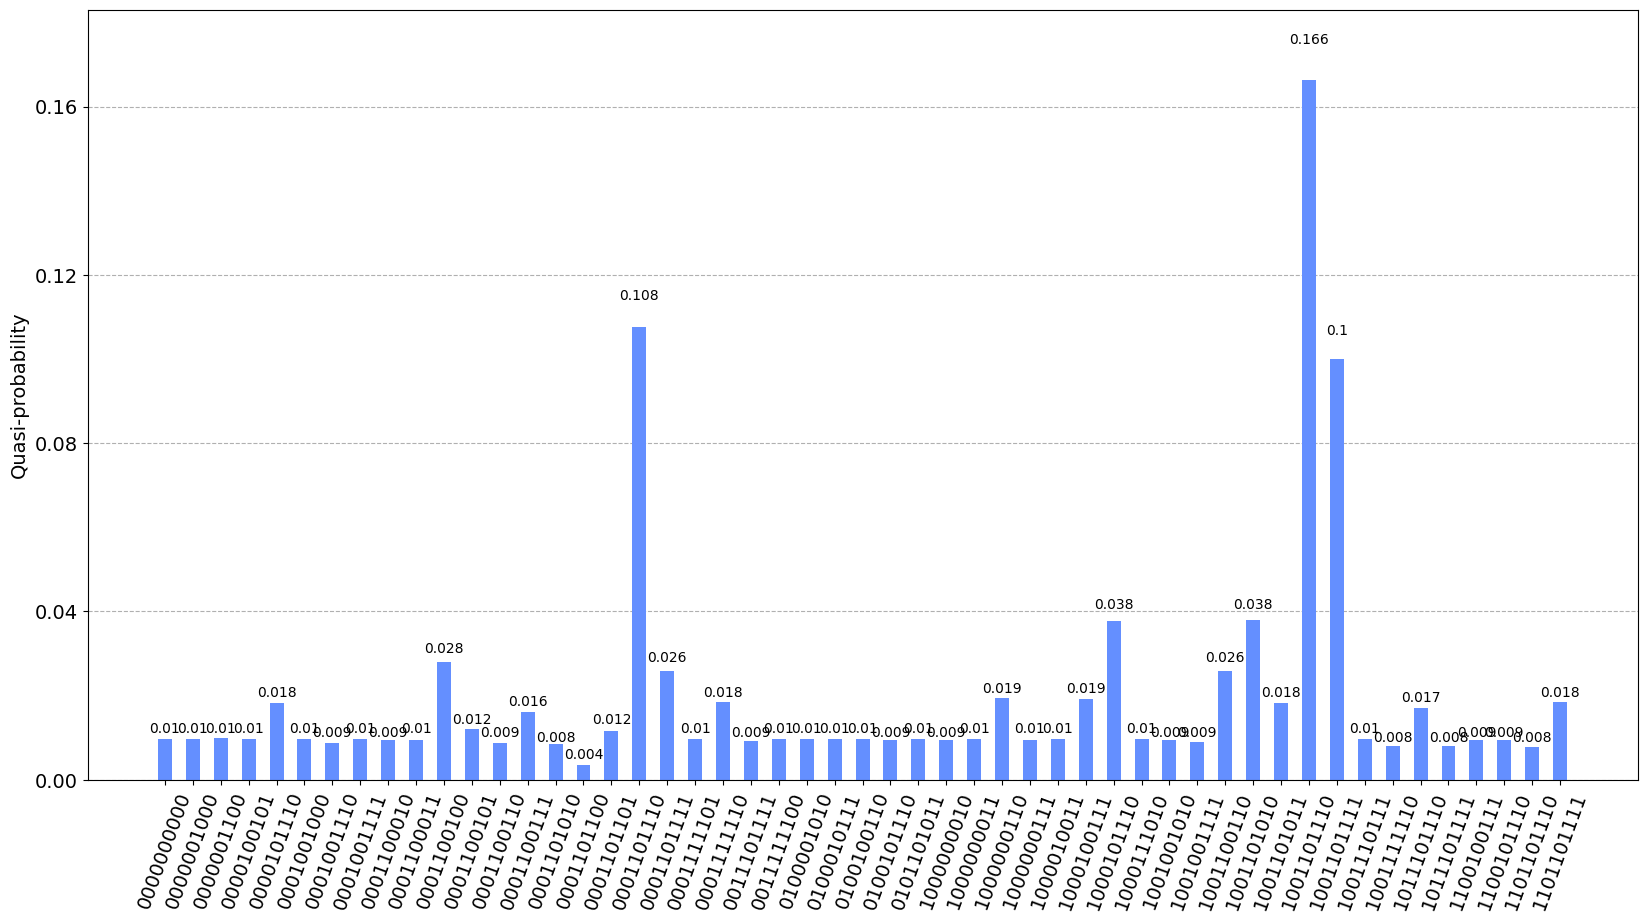

In [22]:
plot_distribution(result.binary_probabilities(), figsize=(20, 10))
